In [1]:
import numpy as np

In [2]:
fh = open("michelson_data.txt", "r")
data = np.array([np.array(list(map(int,line.split()))) for line in fh.read().splitlines()])
avg_dat = np.array([np.append(data[i],np.average(data[i][1:])) for i in range(len(data[0:,]))])
fh.close()

### Apparatus
A laser of wavelength 535 nm has been used in the interferometer, and the thickness of the glass slab used for measuring the refractive index is 1 mm.

In [3]:
t = 1e-3
wv_l = 532e-9

### Calculation of Refractive Index

The refractive index can be caculated using the angle of incidence ($\theta$) and the fringe shifts ($m$) using the following formula :
$$\boxed{n_g = \cfrac{(1 - \cos\theta)\left(1 - \cfrac{m\lambda}{2t}\right)}{(1 - \cos{\theta}) - \cfrac{m\lambda}{2t}}}$$

Where $t$ is the thickness of the glass slab used, and $\lambda$ is the wavelength of the laser.

In [4]:
n_g = (1 - np.cos(avg_dat[:,11]*np.pi / 180))*(1 - ((avg_dat[:,0]*wv_l)/(2*t))) / ((1 - np.cos(avg_dat[:,11]*np.pi / 180)) - ((avg_dat[:,0]*wv_l)/(2*t)))
n_g

array([1.53069755, 1.56267252, 1.54153369, 1.50257991])

### Calculated refractive index of glass for diffirent fringe shifts


| Fringe Shifts| Avg. angle of incidence |Calculated refractive index|
|:---:|:---:|:---:|
| 20 | 10 | 1.53 |
| 30 | 12 | 1.56 |
| 40 | 14 | 1.54 |
| 50 | 16 | 1.50 |

In [5]:
print(np.average(n_g), np.std(n_g, ddof=1))

1.534370916711259 0.025009650683157074


The value of the refractive index of glass thus obtained is $\boxed{1.53 \pm 0.02}$

### Maximum Permissible Error
The maximum permissible error can be calculated as shown below.
The refractive index $n_g$ is a function of $\theta$. So, we can write 
\begin{align*}
&n_g = f(\theta) \\ 
\Rightarrow &\boxed{\delta n_g = \left|\cfrac{\partial f}{\partial \theta}\right|\delta \theta} \tag{In Radians}
\end{align*}

In our case, $\boxed{\delta \theta = 2 \text{ degrees } = \cfrac{\pi}{90} \text{ radians }}$

So, $\boxed{\delta n_g = \cfrac{\pi}{90}\left|\cfrac{\partial f}{\partial \theta}\right|}$

In [6]:
import sympy as smp
from sympy import init_printing
init_printing()
the, m, lam, ts, x, y = smp.symbols(r"\theta m \lambda t x y")

In [7]:
dtheta_degs = 2 # Least Count of the rotational stage
f = x*y / (x + y - 1)

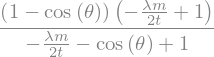

In [8]:
f = f.subs([(x,1-smp.cos(the)), (y, 1-m*lam/(2*ts))])
f

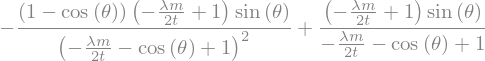

In [9]:
df = smp.diff(f, the)
df

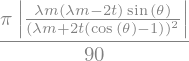

In [10]:
df = abs(df.simplify()*dtheta_degs*smp.pi / 180)
df

In [11]:
df_f = smp.lambdify((the, m, lam, ts), df)

In [12]:
max(df_f(avg_dat[:,11]*np.pi / 180, avg_dat[:,0], wv_l, t))

Hence, the maximum possible error is 0.3